In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.naive_bayes import MultinomialNB


In [4]:
df=pd.read_csv("weight_height_dataset.csv")
df

,Height(cm),Weight(kg),Class
0,171.408421,69.037935,Normal
1,153.935688,47.797508,Underweight
2,176.573961,78.871438,Overweight
3,170.663093,70.263714,Normal
4,164.009912,68.730922,Normal
...,...,...,...
145,181.933161,85.660306,Overweight
146,166.007758,73.997699,Normal
147,158.383396,55.464065,Underweight
148,174.596901,86.130276,Overweight


In [21]:


# Separate features and target variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
M_NB=MultinomialNB()
M_NB.fit(X_train,y_train)

MultinomialNB()

In [23]:
y_preds=M_NB.predict(X_test)

In [16]:
X_test

array([[167.99419229,  76.5051536 ],
       [156.64726062,  51.33501569],
       [171.33392001,  70.91290093],
       [169.96848569,  73.90236291],
       [171.38971981,  68.77971958],
       [177.74052724,  83.35217598],
       [179.09816868,  82.6293651 ],
       [174.60406952,  92.59263277],
       [160.64871894,  66.32700498],
       [161.58688697,  58.77170026],
       [168.89097961,  70.71671973],
       [176.2995982 ,  89.70929285],
       [159.92421056,  56.15337775],
       [179.19893243,  89.6255121 ],
       [163.49009178,  56.48363159],
       [165.33654012,  58.20604741],
       [162.29913354,  69.27038479],
       [166.18355932,  63.98063667],
       [163.74188778,  70.11308016],
       [179.32207141,  96.8395841 ],
       [164.58206476,  52.4875627 ],
       [165.92411242,  66.63227682],
       [164.0211279 ,  73.49798234],
       [161.80682965,  62.96365744],
       [175.38251162,  84.6989449 ],
       [181.93316061,  85.66030562],
       [180.53862447,  84.07020316],
 

In [32]:
labels=M_NB.classes_#reference

In [25]:
y_preds

array(['Overweight', 'Underweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Overweight', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Overweight', 'Underweight',
       'Underweight', 'Normal', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Underweight', 'Overweight',
       'Overweight', 'Overweight', 'Underweight', 'Overweight',
       'Overweight', 'Normal', 'Underweight', 'Normal', 'Normal',
       'Normal', 'Overweight', 'Overweight', 'Underweight'], dtype='<U11')

In [26]:
X_test.shape

(38, 2)

In [27]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,y_preds)
cf

array([[11,  4,  2],
       [ 1, 11,  0],
       [ 0,  0,  9]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=M_NB.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_preds))

Train data accuracy: 0.8392857142857143
Test data accuracy: 0.8157894736842105


In [30]:
scores=cross_val_score(M_NB,X_train,y_train,cv=5,scoring='accuracy')
accuracy=scores.mean()
accuracy

0.8221343873517787

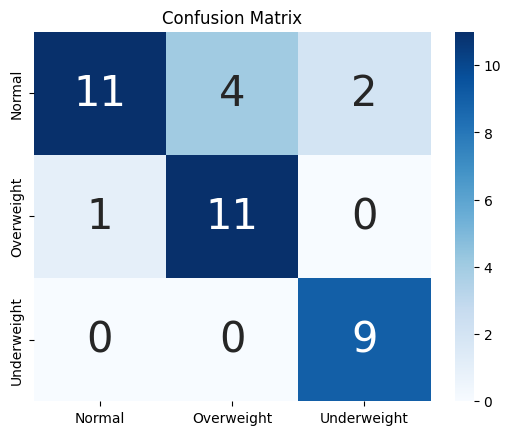

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot confusion matrix
ax = plt.axes()
df_cm = cf

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", xticklabels=labels, yticklabels=labels,ax = ax )
ax.set_title('Confusion Matrix')
plt.show()
